## Aim:
Prediction of class of user

### About Dataset
Prediction task is to determine Work Class of a user.

#### Columns are:
1. age: continuous.

2. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

3. fnlwgt: continuous.

4. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

5. education-num: continuous.

6. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

7. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

8. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

10. sex: Female, Male.

11. capital-gain: continuous.

12. capital-loss: continuous.

13. hours-per-week: continuous.

14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

15. salary: <=50K or >50K

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import RobustScaler
import plotly.express as px

### Data Preprocessing

In [2]:
# Reading data 
df = pd.read_csv(r"C:\Users\super\Software\Mega\Academics\5th sem labs\DS Lab\Datasets\salary.csv", na_values=[' ?' ])

In [483]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [484]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Dropping `education-num` column (redundant)

In [485]:
df.drop('education-num', axis=1, inplace=True)

In [486]:
#rows and columns 
df.shape

(32561, 14)

In [487]:
# check data type of each coulmn
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   marital-status  32561 non-null  object
 5   occupation      30718 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  31978 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [488]:
# Number of uniques values in dataframe

pd.DataFrame({'': df.nunique().index , 'Number of unique values':  df.nunique().values})

,,Number of unique values
0,age,73
1,workclass,8
2,fnlwgt,21648
3,education,16
4,marital-status,7
5,occupation,14
6,relationship,6
7,race,5
8,sex,2
9,capital-gain,119


In [489]:
#show unique values for all columns
for col in df.columns.values:
  print(col, end="\n\n")
  print(df[col].unique(), end="\n\n ***********************************\n\n")

age

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]

 ***********************************

workclass

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 nan ' Self-emp-inc' ' Without-pay' ' Never-worked']

 ***********************************

fnlwgt

[ 77516  83311 215646 ...  34066  84661 257302]

 ***********************************

education

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

 ***********************************

marital-status

[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

 ***********************************

occupation

[' Adm-clerical' ' Exec-manageria

#### Removing spaces from objects data types

In [490]:
df.loc[: , df.dtypes == np.object].apply(lambda e : e.unique())

C:\Users\super\AppData\Local\Temp\ipykernel_20904\3819551187.py:1: DeprecationWarning:

`np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



workclass         [ State-gov,  Self-emp-not-inc,  Private,  Fed...
education         [ Bachelors,  HS-grad,  11th,  Masters,  9th, ...
marital-status    [ Never-married,  Married-civ-spouse,  Divorce...
occupation        [ Adm-clerical,  Exec-managerial,  Handlers-cl...
relationship      [ Not-in-family,  Husband,  Wife,  Own-child, ...
race              [ White,  Black,  Asian-Pac-Islander,  Amer-In...
sex                                                [ Male,  Female]
native-country    [ United-States,  Cuba,  Jamaica,  India, nan,...
salary                                              [ <=50K,  >50K]
dtype: object

In [491]:
for col in df.loc[: , df.dtypes == np.object].columns:
    df[col] = df[col].str.strip()

C:\Users\super\AppData\Local\Temp\ipykernel_20904\1079439496.py:1: DeprecationWarning:

`np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [492]:
#some statistical information about data 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [493]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

#### Fill NaN values by MODE

In [494]:
df['workclass'].fillna(df['workclass'].mode()[0] , axis=0 ,inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0] , axis=0 ,inplace=True)
df['native-country'].fillna(df['native-country'].mode()[0] , axis=0 ,inplace=True)

In [495]:
#check null values again
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

#### Dropping duplicates:

In [496]:
#check Duplicates
df.duplicated().sum()

24

In [497]:
#remove duplicate but leave one 
df.drop_duplicates(keep='first',inplace=True)
df.shape

(32537, 14)

In [498]:
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Data Visualization:

In [499]:
# To put percentage numbers above chart ( With hue , Without hue)
def percen (plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.0f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

def percen_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.0f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

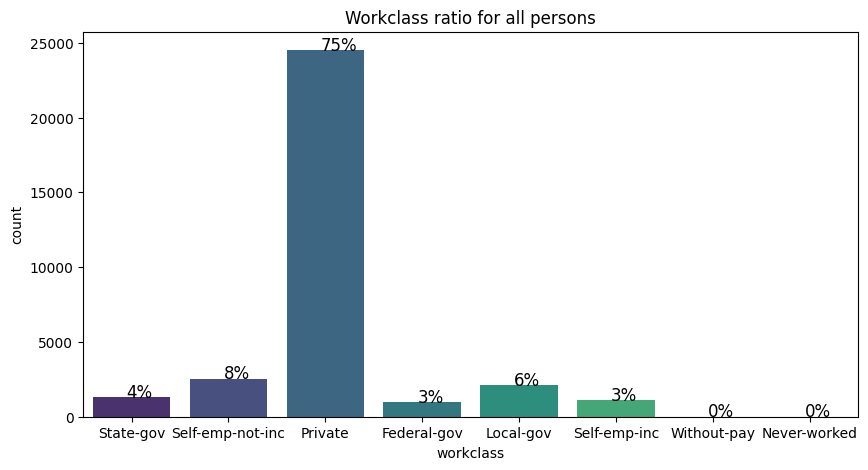

In [500]:
plt.figure(figsize=(10,5))
ax = sns.countplot( x=df.workclass , data= df , palette='viridis')
ax.set_title('Workclass ratio for all persons')
percen(ax , df.salary)

Text(0.5, 1.0, 'Workclass ratio for Male/Female')

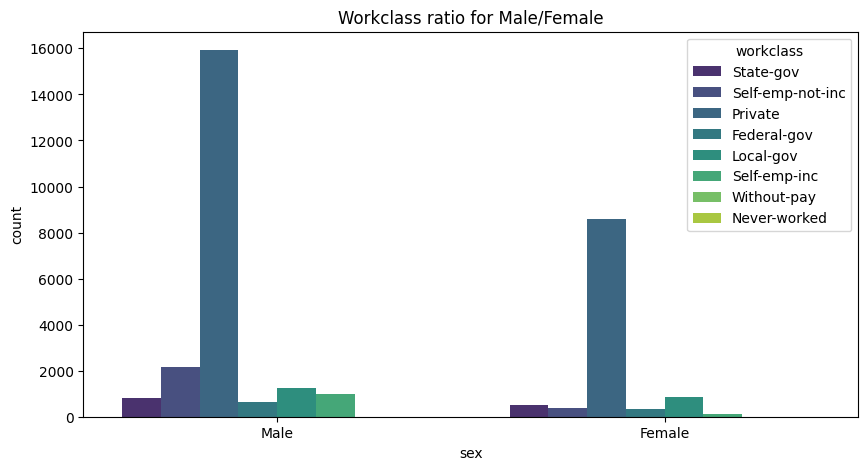

In [501]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='sex', hue='workclass', palette='viridis').set_title('Workclass ratio for Male/Female')

#### Correlation Heatmap:

<AxesSubplot:>

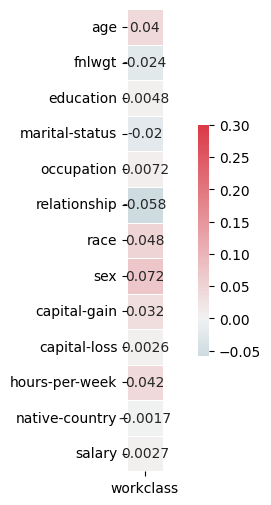

In [533]:
# Select the target variable
target = 'workclass'

# Calculate the correlations with the target variable
corr = df.corr()[target]

# Drop the target variable itself
corr = corr.drop(target)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9,6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr.to_frame(), cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [507]:
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [508]:
df[df['sex']==1].salary.value_counts(normalize=True).mul(100).round(0).astype(str) + ' %'

Series([], Name: salary, dtype: object)

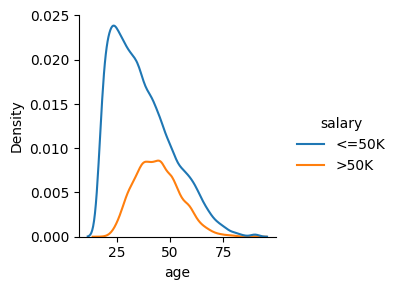

In [509]:
sns.displot(data=df, x="age", hue="salary", kind="kde", height=3, aspect=1)

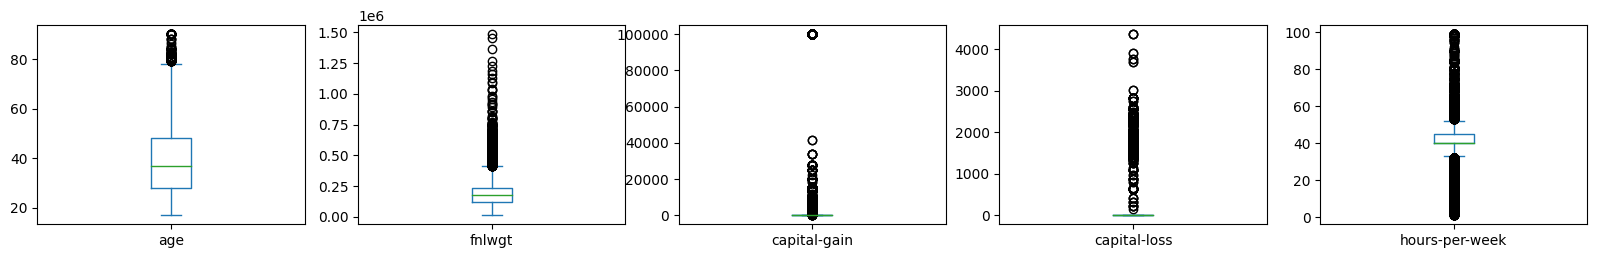

In [510]:
#check outliers
df.plot(kind = "box" , subplots = True , figsize = (20,15) ,  layout = (5,5))
plt.show()

#### Label Encoding:

In [511]:
le = LabelEncoder()

# Select the categorical columns
cat_columns = df.select_dtypes(include=["object"]).columns

# Apply the LabelEncoder to each categorical column
df[cat_columns] = df[cat_columns].apply(lambda col: le.fit_transform(col))

#### Scaling the values:

In [512]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']
scaler.fit(df[cols])
df[cols] = scaler.transform(df[cols])

In [513]:
x = df.drop('workclass', axis=1)
y = df['workclass']

In [514]:
smote=SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

### Model Building and Training:
Algorithm used: `KNN`

In [524]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)

In [525]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2,random_state=44 )

In [526]:
model = clf.fit(x_train, y_train)

In [527]:
y_pred = model.predict(x_test)

#### Accuracy:

In [528]:
print("Accuracy on Test Data : {:,.2f}".format(clf.score(x_test , y_test) *100 ) , '%')

Accuracy on Test Data : 84.25 %


In [529]:
print(accuracy_score(y_pred, y_test))

0.8424837434655107


#### Confusion Matrix:

In [530]:
confusion_matrix(y_test ,y_pred)

array([[4408,  116,    1,   66,   43,   43,  117,    2],
       [ 245, 4053,    7,  127,   93,   94,  200,    6],
       [   0,    0, 4870,    0,    0,    0,    1,    0],
       [ 518,  645,   34, 2211,  408,  629,  527,    8],
       [  97,  102,    0,   86, 4415,  162,   74,    2],
       [ 119,  190,    0,  214,  273, 4141,  126,    4],
       [ 215,  243,    1,  145,   80,  109, 4103,    5],
       [   0,    0,    0,    0,    0,    0,    0, 4837]], dtype=int64)

C:\Users\super\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



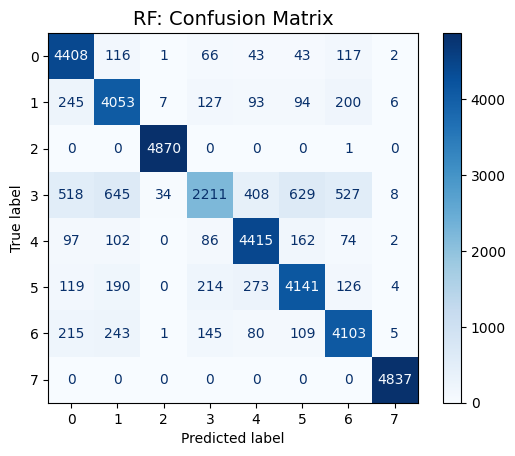

In [531]:
plot_confusion_matrix(model, x_test, y_test,cmap='Blues')
plt.title('RF: Confusion Matrix', fontsize=14)
plt.show()

In [532]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      4796
           1       0.76      0.84      0.80      4825
           2       0.99      1.00      1.00      4871
           3       0.78      0.44      0.56      4980
           4       0.83      0.89      0.86      4938
           5       0.80      0.82      0.81      5067
           6       0.80      0.84      0.82      4901
           7       0.99      1.00      1.00      4837

    accuracy                           0.84     39215
   macro avg       0.84      0.84      0.84     39215
weighted avg       0.84      0.84      0.84     39215



### Conclusion:
Desired task was performed with KNN algorithm with approx. `85%` accuracy.